<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [20]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [21]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [22]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [23]:
print("Shape:", boston_df.shape)
boston_df.head()

Shape: (506, 14)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [24]:
boston_df.describe(include='all')

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


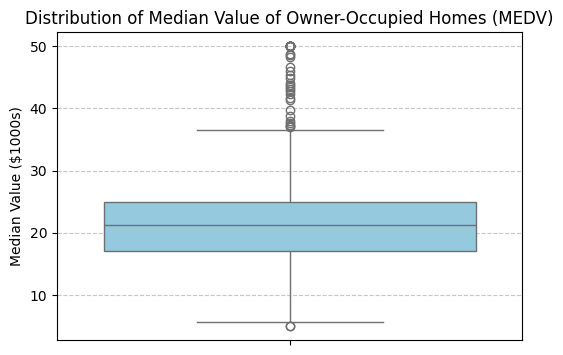


Interpretation:
This boxplot shows the spread of home values in $1000s. 
Outliers above the upper whisker represent high-value neighborhoods.
A moderate spread indicates price variability across Boston towns.



In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(y=boston_df['MEDV'], color='skyblue')
plt.title('Distribution of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value ($1000s)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("""
Interpretation:
This boxplot shows the spread of home values in $1000s. 
Outliers above the upper whisker represent high-value neighborhoods.
A moderate spread indicates price variability across Boston towns.
""")

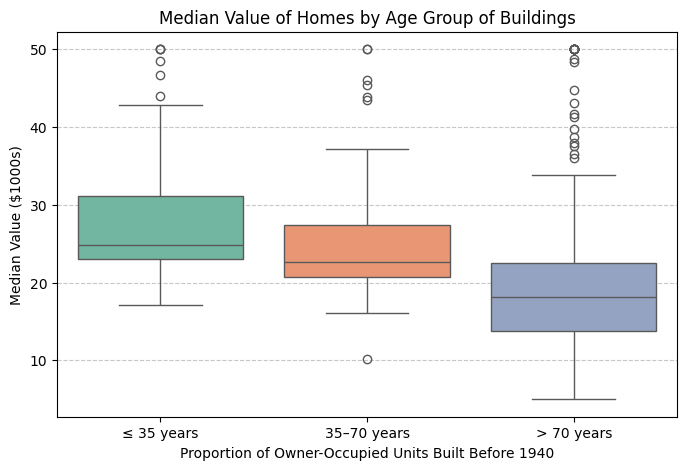


Interpretation:
Newer neighborhoods (≤35 years) tend to have higher median values,
while older areas (>70 years) display lower medians.
This suggests age of housing stock may influence property value.



In [26]:
bins = [0, 35, 70, 100]
labels = ['≤ 35 years', '35–70 years', '> 70 years']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,5))
sns.boxplot(x='AGE_GROUP', y='MEDV', hue='AGE_GROUP', data=boston_df, palette='Set2', legend=False)
plt.title('Median Value of Homes by Age Group of Buildings')
plt.xlabel('Proportion of Owner-Occupied Units Built Before 1940')
plt.ylabel('Median Value ($1000s)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("""
Interpretation:
Newer neighborhoods (≤35 years) tend to have higher median values,
while older areas (>70 years) display lower medians.
This suggests age of housing stock may influence property value.
""")

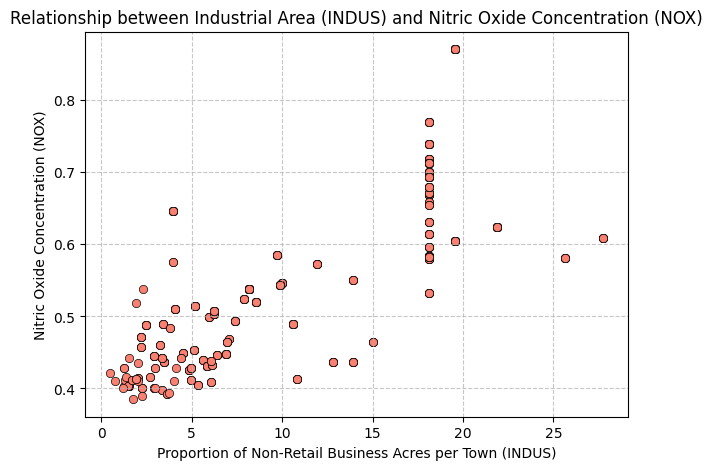


Interpretation:
There is a positive trend—towns with higher proportions of industrial land (higher INDUS)
tend to record greater NOX levels. This suggests industrial activity contributes to air pollution.
We will confirm this relationship statistically in Task 3.



In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='salmon', edgecolor='black')
plt.title('Relationship between Industrial Area (INDUS) and Nitric Oxide Concentration (NOX)')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("""
Interpretation:
There is a positive trend—towns with higher proportions of industrial land (higher INDUS)
tend to record greater NOX levels. This suggests industrial activity contributes to air pollution.
We will confirm this relationship statistically in Task 3.
""")

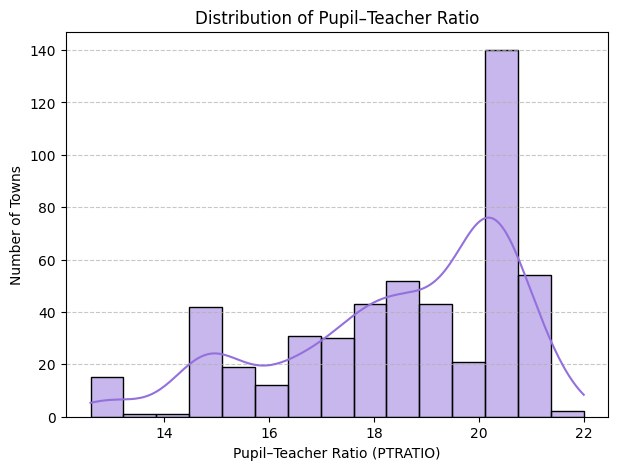


Interpretation:
The histogram shows most towns have pupil–teacher ratios between about 17 and 21.
Higher ratios indicate more crowded schools, which may relate inversely to property values.



In [28]:
plt.figure(figsize=(7,5))
sns.histplot(boston_df['PTRATIO'], bins=15, color='mediumpurple', kde=True)
plt.title('Distribution of Pupil–Teacher Ratio')
plt.xlabel('Pupil–Teacher Ratio (PTRATIO)')
plt.ylabel('Number of Towns')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("""
Interpretation:
The histogram shows most towns have pupil–teacher ratios between about 17 and 21.
Higher ratios indicate more crowded schools, which may relate inversely to property values.
""")

In [31]:
# === Task 3: Hypothesis Testing ===
print("=== Q1: T-test for Independent Samples (CHAS vs MEDV) ===")

# Hypotheses:
# H0: Mean(MEDV for CHAS=0) = Mean(MEDV for CHAS=1)
# H1: Mean(MEDV for CHAS=0) ≠ Mean(MEDV for CHAS=1)
# α = 0.05

river = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = stats.ttest_ind(river, no_river, equal_var=False)
print(f"T-statistic = {t_stat:.4f},  p-value = {p_val:.4f}")

if p_val < 0.05:
    print("Conclusion: Reject H0 → There IS a significant difference in median home values between areas near the Charles River and those not near it.")
else:
    print("Conclusion: Fail to reject H0 → There is NO significant difference in median home values with respect to proximity to the Charles River.")

=== Q1: T-test for Independent Samples (CHAS vs MEDV) ===
T-statistic = 3.1133,  p-value = 0.0036
Conclusion: Reject H0 → There IS a significant difference in median home values between areas near the Charles River and those not near it.


In [33]:
print("\n=== Q2: One-way ANOVA (AGE_GROUP vs MEDV) ===")

# Hypotheses:
# H0: Mean(MEDV) is equal across all AGE_GROUP categories
# H1: At least one AGE_GROUP has a different mean MEDV
# α = 0.05

anova_model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

p_val_anova = anova_table["PR(>F)"].iloc[0]

if p_val_anova < 0.05:
    print("Conclusion: Reject H0 → There IS a significant difference in median home values across AGE groups.")
else:
    print("Conclusion: Fail to reject H0 → No significant difference in median home values across AGE groups.")


=== Q2: One-way ANOVA (AGE_GROUP vs MEDV) ===
                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Conclusion: Reject H0 → There IS a significant difference in median home values across AGE groups.


In [34]:
print("\n=== Q3: Pearson Correlation (NOX vs INDUS) ===")

# Hypotheses:
# H0: ρ = 0 (no linear correlation)
# H1: ρ ≠ 0 (there is a linear correlation)
# α = 0.05

corr_coef, p_val_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson correlation = {corr_coef:.4f},  p-value = {p_val_corr:.4f}")

if p_val_corr < 0.05:
    print("Conclusion: Reject H0 → There IS a significant linear relationship between NOX and INDUS (positive correlation expected).")
else:
    print("Conclusion: Fail to reject H0 → No significant linear relationship between NOX and INDUS.")


=== Q3: Pearson Correlation (NOX vs INDUS) ===
Pearson correlation = 0.7637,  p-value = 0.0000
Conclusion: Reject H0 → There IS a significant linear relationship between NOX and INDUS (positive correlation expected).


In [35]:
print("\n=== Q4: Simple Linear Regression (DIS → MEDV) ===")

# Hypotheses:
# H0: β(DIS) = 0 (no linear impact)
# H1: β(DIS) ≠ 0 (distance has an effect on median home value)
# α = 0.05

reg_model = ols('MEDV ~ DIS', data=boston_df).fit()
print(reg_model.summary())

p_val_reg = reg_model.pvalues['DIS']
beta_dis = reg_model.params['DIS']

if p_val_reg < 0.05:
    print(f"Conclusion: Reject H0 → DIS has a significant impact on MEDV. "
          f"Each one-unit increase in DIS changes MEDV by {beta_dis:.3f} thousand dollars.")
else:
    print("Conclusion: Fail to reject H0 → DIS does not have a statistically significant effect on MEDV.")


=== Q4: Simple Linear Regression (DIS → MEDV) ===
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        00:23:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I